<a href="https://colab.research.google.com/github/IrfanKpm/Machine-Learning-Notes1/blob/main/topics/Tfid_cosine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import difflib
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
samples = [
    "Reading books improves knowledge and skills.",
    "Studying expands your knowledge and abilities.",
    "Books enhance learning and cognitive skills.",
    "Learning new skills boosts mental capacity.",
    "Acquiring knowledge strengthens mental faculties.",
    "Skill development improves cognitive functions greatly.",
    "Education enhances mental growth and abilities.",
    "Improving skills increases intellectual capacity."
]


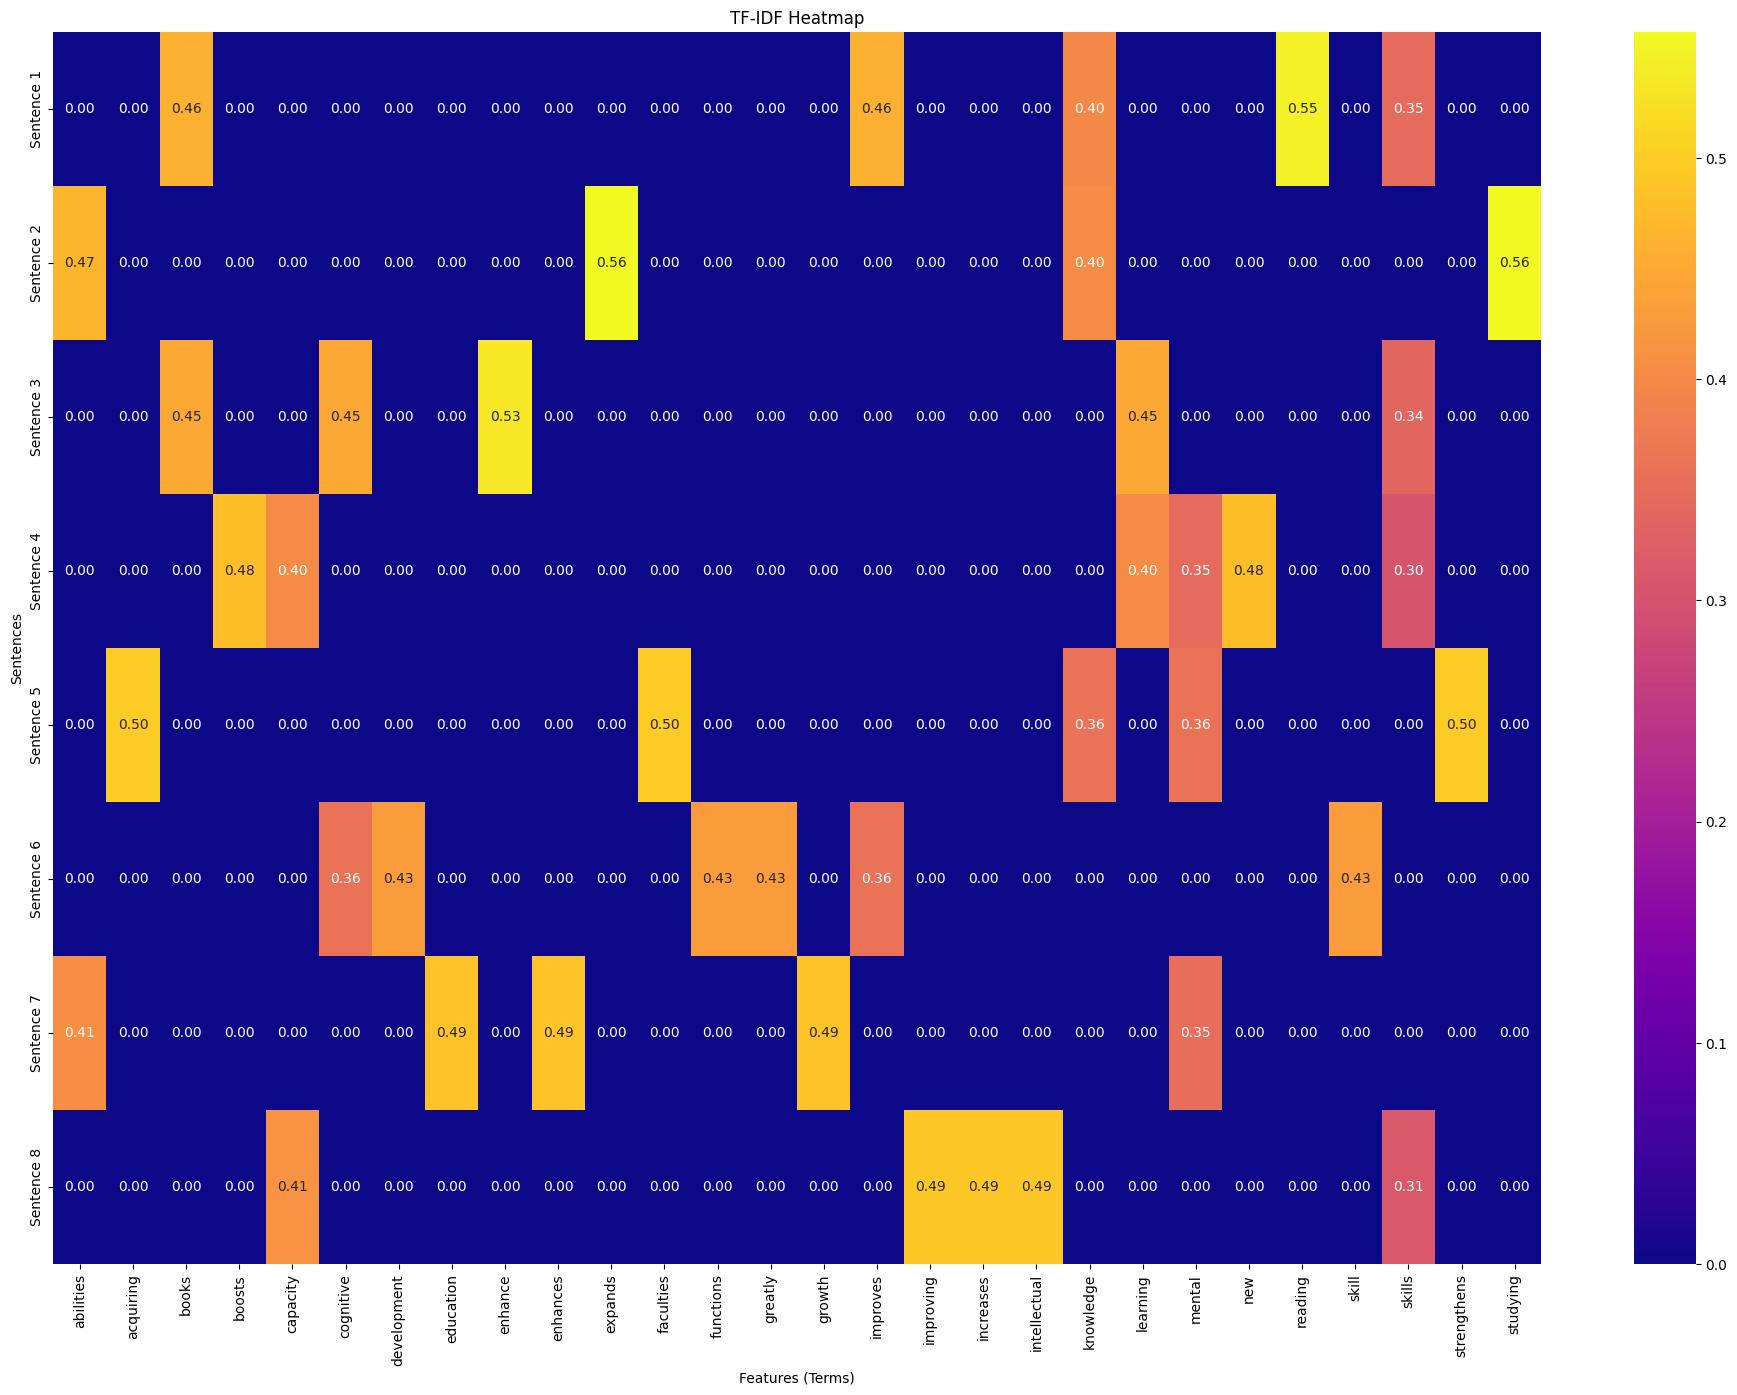

In [3]:
# Initialize the TF-IDF vectorizer with stop words removal
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the sample sentences
vectors = vectorizer.fit_transform(samples)

# Convert to an array if needed
vectors_array = vectors.toarray()

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame for better visualization
df = pd.DataFrame(vectors_array, columns=feature_names)

# Plot the heatmap with a new color map
plt.figure(figsize=(24, 16))
sns.heatmap(df, annot=True, cmap="plasma", fmt=".2f", cbar=True, xticklabels=feature_names, yticklabels=[f'Sentence {i+1}' for i in range(len(samples))])
plt.title('TF-IDF Heatmap')
plt.xlabel('Features (Terms)')
plt.ylabel('Sentences')
plt.show()

In [4]:
# Function to find and print the most similar sentences
def find_similar_sentences(input_sentence, sample_sentences):
    # Transform the input sentence
    input_vector = vectorizer.transform([input_sentence])

    # Compute cosine similarities
    similarities = cosine_similarity(input_vector, vectors)

    # Get indices of the top 3 most similar sentences
    top_indices = similarities[0].argsort()[-3:][::-1]

    # Print the top 3 most similar sentences
    print("Top 3 most similar sentences:")
    for index in top_indices:
        print(sample_sentences[index])

In [ ]:
# Input sentence from user
input_sentence = input("Enter a sentence: ")

# Find and print similar sentences
find_similar_sentences(input_sentence, samples)